In [1]:
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体。如果不设置，中文会乱码。这里采用黑体SimHei，也可以考虑其他字体，如宋体SimSun等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

In [2]:
import akshare as ak

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [3]:
df = ak.fund_etf_hist_sina(symbol="sh510300")
df.head()

,date,open,high,low,close,volume
0,2012-05-28,2.551,2.607,2.544,2.604,1277518720
1,2012-05-29,2.602,2.661,2.602,2.644,714948992
2,2012-05-30,2.642,2.647,2.633,2.636,265887200
3,2012-05-31,2.621,2.645,2.613,2.630,178155984
4,2012-06-01,2.629,2.660,2.620,2.630,179350032


In [4]:
close = df.close
close.head()

0    2.604
1    2.644
2    2.636
3    2.630
4    2.630
Name: close, dtype: float64

In [5]:
# 创建close的5阶滞后
lags = 5
cols = []

for lag in range(1,lags+1):
    col = f'lag_{lag}'
    df[col] = df.close.shift(lag)
    cols.append(col)
    
df

,date,open,high,low,close,volume,lag_1,lag_2,lag_3,lag_4,lag_5
0,2012-05-28,2.551,2.607,2.544,2.604,1277518720,NaN,NaN,NaN,NaN,NaN
1,2012-05-29,2.602,2.661,2.602,2.644,714948992,2.604,NaN,NaN,NaN,NaN
2,2012-05-30,2.642,2.647,2.633,2.636,265887200,2.644,2.604,NaN,NaN,NaN
3,2012-05-31,2.621,2.645,2.613,2.630,178155984,2.636,2.644,2.604,NaN,NaN
4,2012-06-01,2.629,2.660,2.620,2.630,179350032,2.630,2.636,2.644,2.604,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2545,2022-11-14,3.898,3.919,3.840,3.850,850966866,3.848,3.750,3.771,3.811,3.834
2546,2022-11-15,3.842,3.934,3.835,3.925,767183469,3.850,3.848,3.750,3.771,3.811
2547,2022-11-16,3.918,3.938,3.891,3.896,537797213,3.925,3.850,3.848,3.750,3.771
2548,2022-11-17,3.886,3.886,3.835,3.879,791622815,3.896,3.925,3.850,3.848,3.750


<AxesSubplot:xlabel='date'>

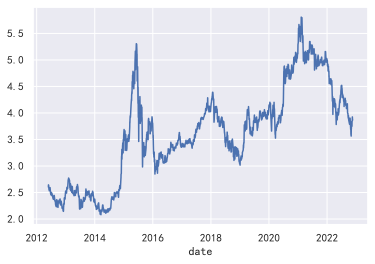

In [6]:
# 线性回归

df.set_index('date').close.plot()



<AxesSubplot:>

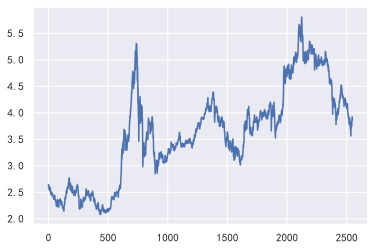

In [7]:
df['close'].plot()

In [8]:
data = df[['date','close']].set_index('date')


In [9]:
data['returns'] = np.log(data.close / data.close.shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data.returns).astype(int)
data.head()

,close,returns,direction
date,,,
2012-05-29,2.644,0.015244,1
2012-05-30,2.636,-0.003030,-1
2012-05-31,2.630,-0.002279,-1
2012-06-01,2.630,0.000000,0
2012-06-04,2.558,-0.027758,-1


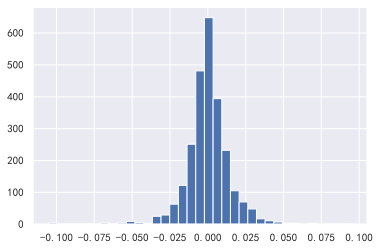

In [10]:
data.returns.hist(bins=35);

In [11]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = f'lag_{lag}'
        data[col] = data.returns.shift(lag)
        cols.append(col)
        
create_lags(data)
cols

['lag_1', 'lag_2']

In [12]:
data.head()

,close,returns,direction,lag_1,lag_2
date,,,,,
2012-05-29,2.644,0.015244,1,NaN,NaN
2012-05-30,2.636,-0.003030,-1,0.015244,NaN
2012-05-31,2.630,-0.002279,-1,-0.003030,0.015244
2012-06-01,2.630,0.000000,0,-0.002279,-0.003030
2012-06-04,2.558,-0.027758,-1,0.000000,-0.002279


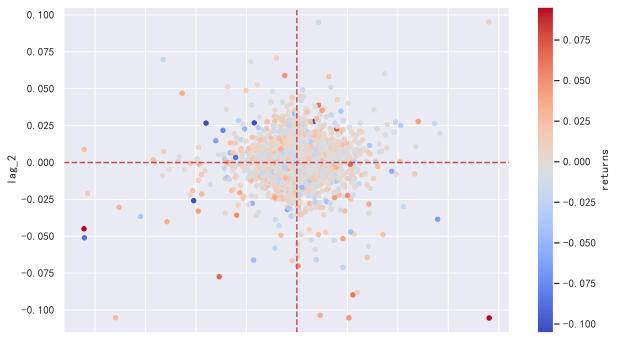

In [13]:
data.dropna(inplace=True)

data.plot.scatter(x='lag_1', y='lag_2', c='returns', 
                          cmap='coolwarm', figsize=(10, 6), colorbar=True) 
plt.axvline(0, c='r', ls='--') 
plt.axhline(0, c='r', ls='--'); 

## 回归



In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [15]:
data['pos_ols_1'] = model.fit(data[cols],
                                data['returns']).predict(data[cols])

data['pos_ols_2'] = model.fit(data[cols],
                                data['direction']).predict(data[cols])                               


In [16]:
data[['pos_ols_1','pos_ols_2']].head()

,pos_ols_1,pos_ols_2
date,,
2012-05-31,-0.001010,-0.015683
2012-06-01,0.000306,0.025428
2012-06-04,0.000319,0.017541
2012-06-05,-0.000646,0.086636
2012-06-06,0.002157,0.074527


In [17]:
data['returns']

date
2012-05-31   -0.002279
2012-06-01    0.000000
2012-06-04   -0.027758
2012-06-05    0.001172
2012-06-06   -0.000781
                ...   
2022-11-14    0.000520
2022-11-15    0.019293
2022-11-16   -0.007416
2022-11-17   -0.004373
2022-11-18   -0.003357
Name: returns, Length: 2547, dtype: float64

In [18]:
data[['pos_ols_1', 'pos_ols_2']] = np.where( 
                     data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [19]:
data['pos_ols_1'].value_counts()

 1    1497
-1    1050
Name: pos_ols_1, dtype: int64

In [20]:
data['pos_ols_2'].value_counts()

 1    1584
-1     963
Name: pos_ols_2, dtype: int64

In [21]:
(data['pos_ols_1'].diff() != 0).sum() 

1558

In [22]:
(data['pos_ols_2'].diff() != 0).sum()

796

In [23]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns'] 
data['strat_ols_2'] = data['pos_ols_2'] * data['returns'] 
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        1.466616
strat_ols_1    1.919421
strat_ols_2    0.357634
dtype: float64

In [24]:
(data['direction'] == data['pos_ols_1']).value_counts()

False    1289
True     1258
dtype: int64

In [25]:
(data['direction'] == data['pos_ols_2']).value_counts()

False    1291
True     1256
dtype: int64

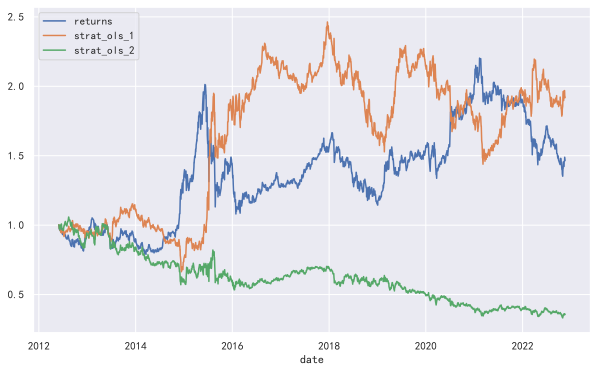

In [26]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum( 
                 ).apply(np.exp).plot(figsize=(10, 6));

## 聚类

In [27]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=2, random_state=0)


In [28]:
model.fit(data[cols]) 


KMeans(n_clusters=2, random_state=0)

In [29]:
data['pos_clus'] = model.predict(data[cols])

In [30]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)

In [31]:
data['pos_clus'].values 

array([-1, -1, -1, ...,  1, -1, -1])

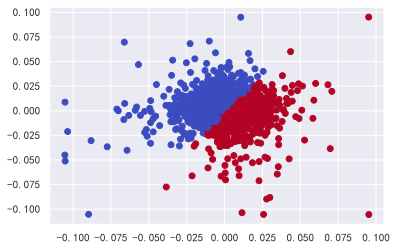

In [32]:
plt.figure() 
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1], 
            c=data['pos_clus'], cmap='coolwarm'); 

In [33]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp) 

returns       1.466616
strat_clus    2.535138
dtype: float64

In [34]:
(data['direction'] == data['pos_clus']).value_counts() 

False    1312
True     1235
dtype: int64

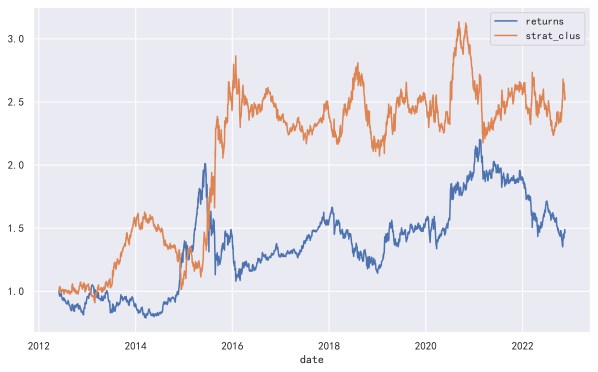

In [35]:
data[['returns', 'strat_clus']].cumsum( 
                 ).apply(np.exp).plot(figsize=(10, 6)); 

## 频率方法